In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
import collections

In [3]:
df = pd.read_csv('/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv')

In [4]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
#Dropping Useless Columns
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [6]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [7]:
df.shape

(16744, 15)

In [8]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

In [9]:
#Adding generes to columns
genres = df['Genres'].str.get_dummies(',')
df = pd.concat([df, genres], axis=1, sort=False)
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')

In [10]:
#Seperating different Platform

netflix = df.loc[df['Netflix']==1]
hulu = df.loc[df['Hulu']==1]
prime = df.loc[df['Prime Video']==1]
disney = df.loc[df['Disney+']==1]

In [11]:
#Dropping all the columns containing platform name as it will be useless
netflix = netflix.drop(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis=1)
hulu = hulu.drop(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis=1)
prime = prime.drop(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis=1)
disney = disney.drop(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis=1)

In [12]:
for name, d in zip(['Netflix', 'Hulu', 'Prime Videos', 'Disney+'], [netflix, hulu, prime, disney]):
    print(f'Total no. of Movies in {name}: {d.shape[0]}')
netflix.head()

Total no. of Movies in Netflix: 3560
Total no. of Movies in Hulu: 903
Total no. of Movies in Prime Videos: 12354
Total no. of Movies in Disney+: 564


,Title,Year,Age,IMDb,Rotten Tomatoes,Type,Directors,Genres,Country,Language,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Inception,2010,13+,8.8,87%,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",...,0,0,0,1,0,0,0,1,0,0
1,The Matrix,1999,18+,8.7,87%,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,...,0,0,0,1,0,0,0,0,0,0
2,Avengers: Infinity War,2018,13+,8.5,84%,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,...,0,0,0,1,0,0,0,0,0,0
3,Back to the Future,1985,7+,8.5,96%,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,...,0,0,0,1,0,0,0,0,0,0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,...,0,0,0,0,0,0,0,0,0,1


In [13]:
total_netflix = netflix.shape[0]
total_hulu = hulu.shape[0]
total_disney = disney.shape[0]
total_prime = prime.shape[0]

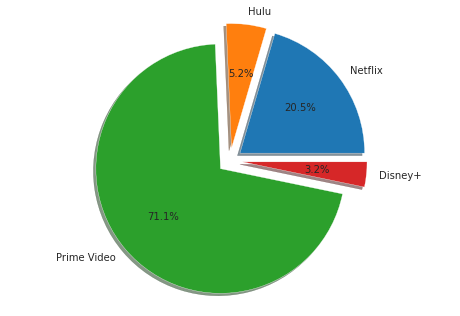

In [14]:
#Pie chart showing platforms with most number of movies

labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
sizes = [total_netflix, total_hulu, total_prime, total_disney]
explode = [0.1, 0.1, 0.1, 0.1]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [15]:
#Adding screenplay column which contain total runtime in hours 
for platform in [netflix, hulu, prime, disney]:
    platform['screenplay'] = platform['Runtime']/60

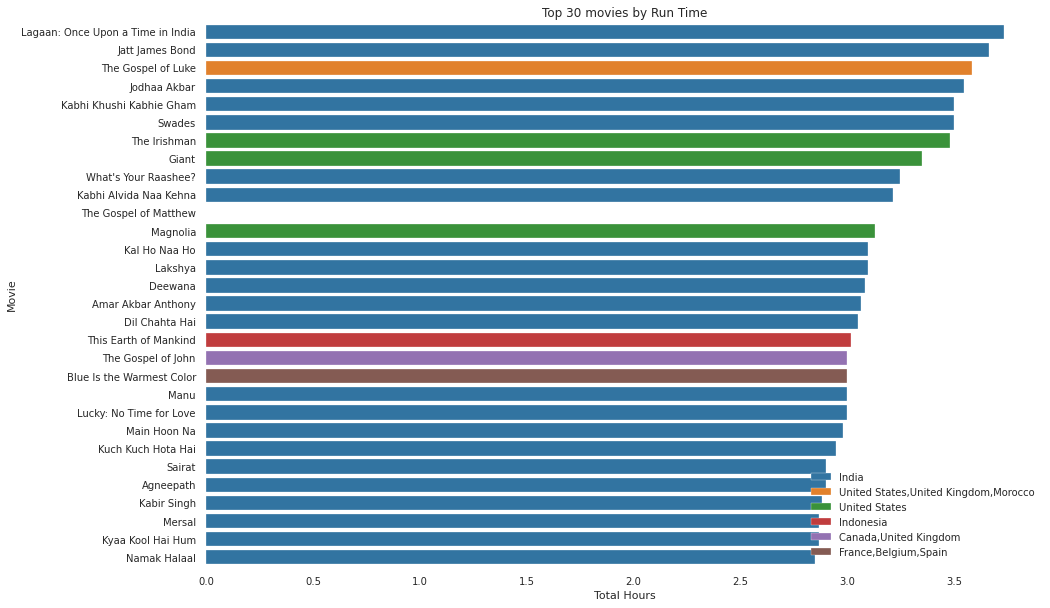

In [16]:
#Top 30 Movies with highest screenplay on Netflix
top_30_screenplay = netflix.sort_values(by='screenplay', ascending=False)[:30]
plt.figure(figsize=(15, 10))
sns.barplot(data=top_30_screenplay, y='Title', x='screenplay', hue='Country', dodge=False)
plt.legend(loc='lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

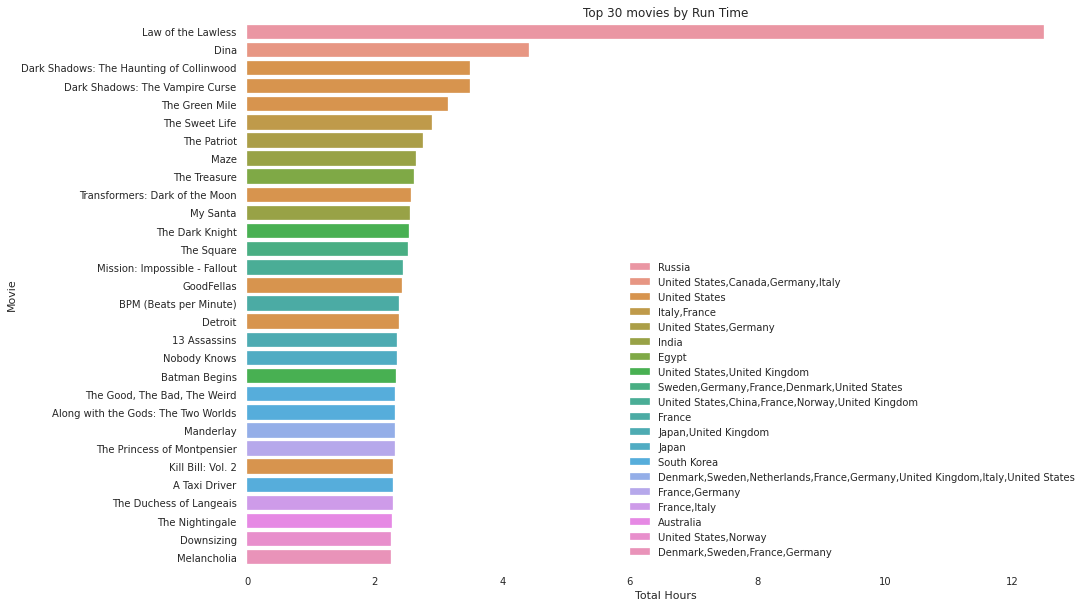

In [17]:
#Top 30 Movies with highest screenplay on Hulu
top_30_screenplay = hulu.sort_values(by='screenplay', ascending=False)[:30]
plt.figure(figsize=(15, 10))
sns.barplot(data=top_30_screenplay, y='Title', x='screenplay', hue='Country', dodge=False)
plt.legend(loc='lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

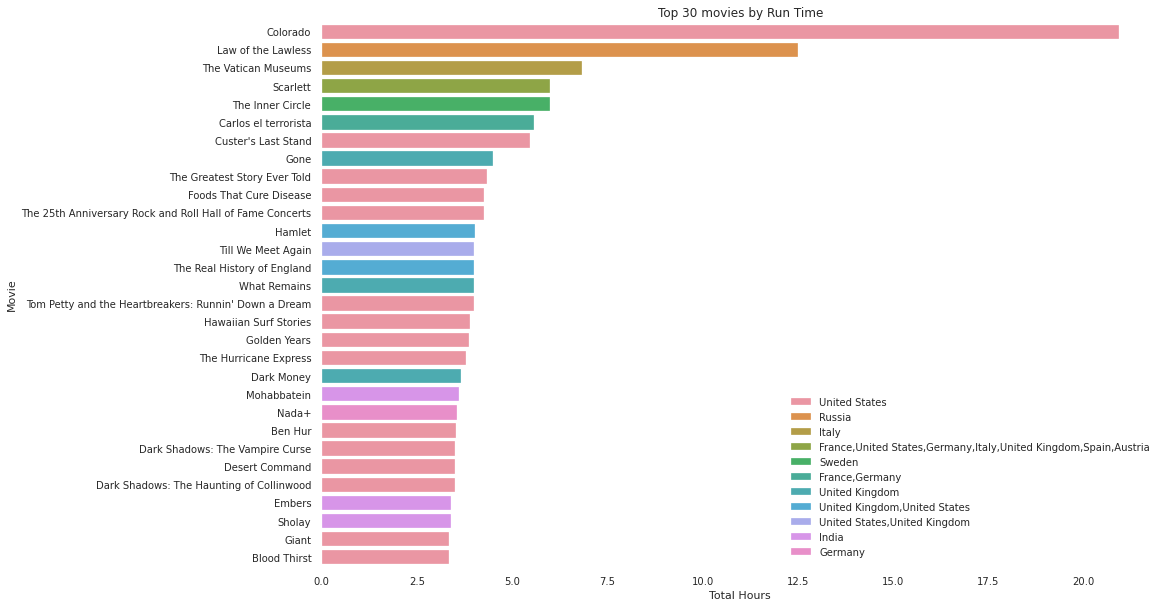

In [18]:
#Top 30 Movies with highest screenplay on Prime Videos
top_30_screenplay = prime.sort_values(by='screenplay', ascending=False)[:30]
plt.figure(figsize=(15, 10))
sns.barplot(data=top_30_screenplay, y='Title', x='screenplay', hue='Country', dodge=False)
plt.legend(loc='lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

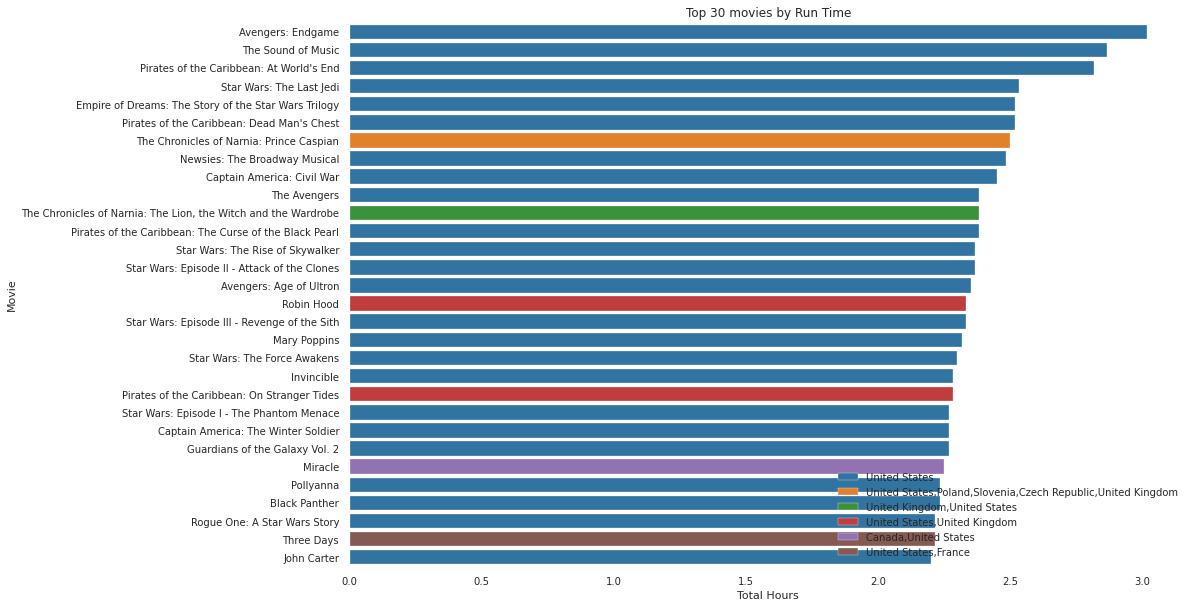

In [19]:
#Top 30 Movies with highest screenplay on Disney+
top_30_screenplay = disney.sort_values(by='screenplay', ascending=False)[:30]
plt.figure(figsize=(15, 10))
sns.barplot(data=top_30_screenplay, y='Title', x='screenplay', hue='Country', dodge=False)
plt.legend(loc='lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 30 movies by Run Time')
plt.show()

In [20]:
#Streaming platforms with most movies above 8 rating b

top_rated = []

for name, d in zip(['Netflix', 'Hulu', 'Prime Videos', 'Disney+'], [netflix, hulu, prime, disney]):
    top = d[d['IMDb']>=8]['Title']
    top_rated.append(top.shape[0])
    print(f'Total movies with 8+ rating(on IMDb) on {name}: {top.shape[0]}')

Total movies with 8+ rating(on IMDb) on Netflix: 166
Total movies with 8+ rating(on IMDb) on Hulu: 34
Total movies with 8+ rating(on IMDb) on Prime Videos: 397
Total movies with 8+ rating(on IMDb) on Disney+: 36


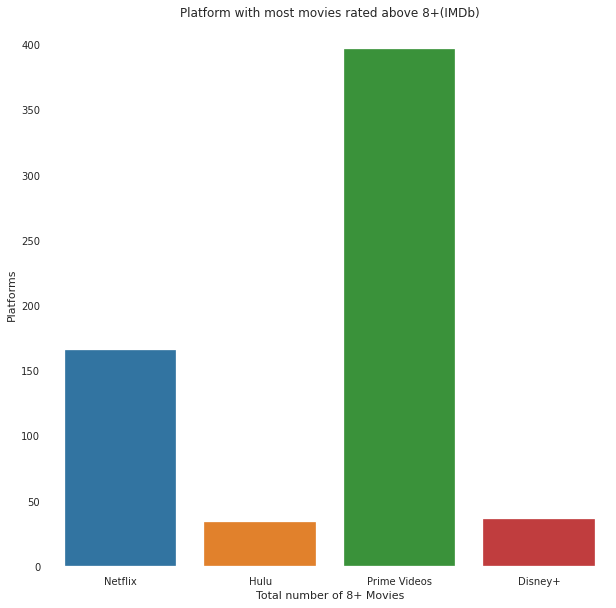

In [21]:
#Plotting a bargraph which shows which platform has highest movies with 8+ rating
top_rated_data = pd.DataFrame({
    'platforms': ['Netflix', 'Hulu', 'Prime Videos', 'Disney+'],
    'total_mov': top_rated
})

plt.figure(figsize=(10, 10))
sns.barplot(data=top_rated_data, x=top_rated_data['platforms'], y=top_rated_data['total_mov'])
plt.xlabel('Total number of 8+ Movies')
plt.ylabel('Platforms')
plt.title('Platform with most movies rated above 8+(IMDb)')
plt.show()

In [22]:
list_genre = df['Genres'].str.split(',', expand=True)

In [23]:
list_genre

,0,1,2,3,4,5,6,7,8
0,Action,Adventure,Sci-Fi,Thriller,None,None,None,None,None
1,Action,Sci-Fi,None,None,None,None,None,None,None
2,Action,Adventure,Sci-Fi,None,None,None,None,None,None
3,Adventure,Comedy,Sci-Fi,None,None,None,None,None,None
4,Western,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
16739,Comedy,Family,Fantasy,Horror,None,None,None,None,None
16740,Comedy,Family,Sci-Fi,None,None,None,None,None,None
16741,Documentary,None,None,None,None,None,None,None,None
16742,Documentary,None,None,None,None,None,None,None,None


In [24]:
#Converting all elements of dataframe into Strings
list_genre = list_genre.applymap(str)

In [25]:
# extracting Genres from the df
genres = []
for i in range(0,9):
    list_genre[i]
    for j in range(0, 16744) :
        if (list_genre[i][j] not in genres) and list_genre[i][j] != 'None' and list_genre[i][j] != 'nan':
            genres.append(list_genre[i][j])
        else:
            pass  

In [26]:
genres

['Action',
 'Adventure',
 'Western',
 'Animation',
 'Biography',
 'Drama',
 'Crime',
 'Comedy',
 'Documentary',
 'Family',
 'Horror',
 'Thriller',
 'Mystery',
 'Fantasy',
 'Romance',
 'Short',
 'Sci-Fi',
 'Talk-Show',
 'Sport',
 'Reality-TV',
 'Musical',
 'Music',
 'War',
 'News',
 'History',
 'Game-Show',
 'Film-Noir']

In [27]:
#The following function is used to display top rated moves based on your favourite Genres and respective platfroms

def top_rated(genre, platform, n_top):
    genre = platform.loc[platform[genre]==1]
    
    top_50 = genre.sort_values(by='IMDb', ascending=False)[:n_top]
    
    plt.figure(figsize=(15, 10))
    sns.barplot(data=top_50, y='Title', x='IMDb', dodge=False)
    plt.legend(loc = 'lower right')
    plt.xlabel('Ratings', FontSize=25)
    plt.ylabel('Movies', FontSize=25)
    plt.title('Top 50 movies by your fav gengres')
    plt.show()

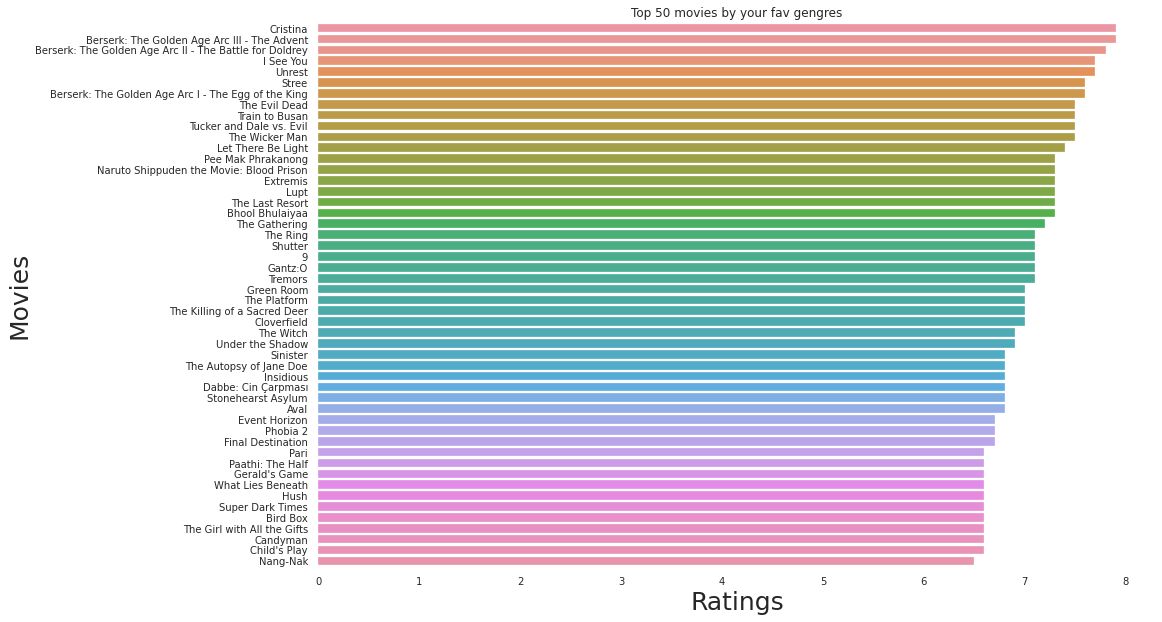

In [28]:
top_rated('Horror', netflix, 50)

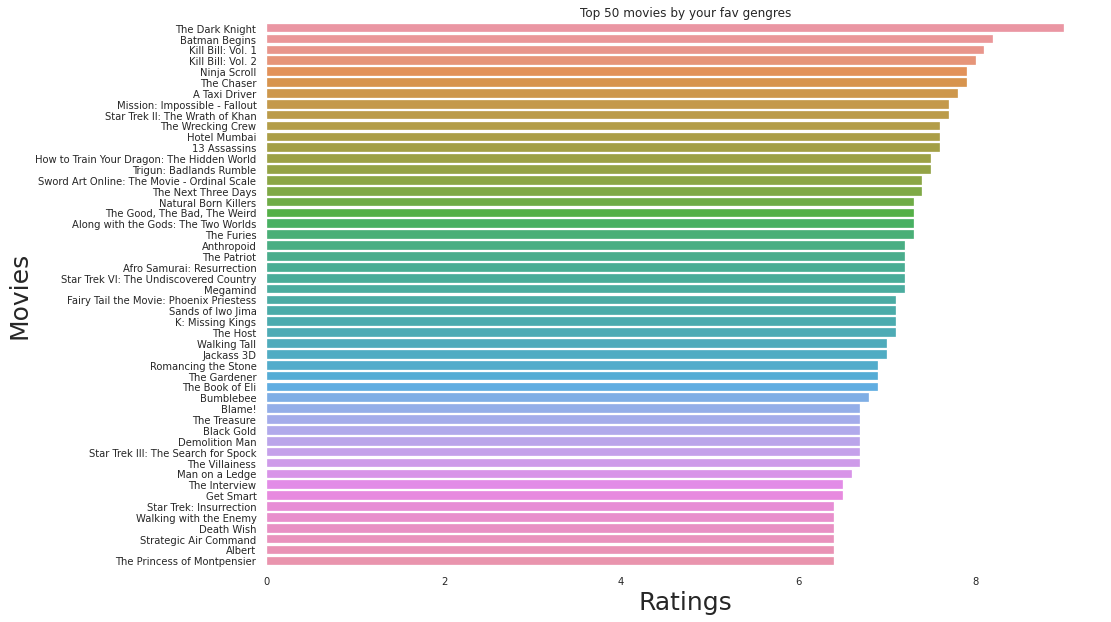

In [29]:
top_rated('Action', hulu, 50)